In [11]:
################### Next
#####################
#Steps for xc erosion
#1. set Umax position
#2. set energy slope
#3. calc Umax
#4. calc VGrad
#5. calc phi (two diff defs?)
#6. calc T_b
#7. adjust T_b onto bed normal vector using angles alpha and phi (maybe can do this from beginning with Vgrad)
#8. calculate erosion rates
#9. avg ersion rate for transport
#10. redraw xc

%pylab inline
from crossSection import CrossSection
from ShapeGen import genCirc, genEll
x, y = genCirc(1.,n=1000)
this_xc = CrossSection(x,y)
this_fd = 1.8001
#this_xc.calcA()
this_xc.setMaxVelPoint(this_fd)
h1=1.
h2=0.5
L=1000
E_slope = (h1-h2)/L 
this_xc.setEnergySlope(E_slope)
this_xc.calcUmax(1.0)
T_b=this_xc.calcT_b()
dr = 0.1*T_b**0.5
this_xc.erode(dr)

Populating the interactive namespace from numpy and matplotlib


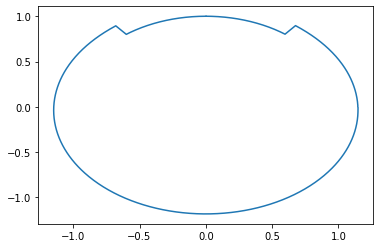

In [12]:
plot(this_xc.x,this_xc.y)

In [ ]:
wetidx = this_xc.wetidx
l = np.hypot(this_xc.x[wetidx] - this_xc.xp[wetidx], this_xc.y[wetidx] - this_xc.yp[wetidx])
phi = np.fabs(np.arctan2(this_xc.ymaxVel - this_xc.y[wetidx],this_xc.xmaxVel -this_xc.x[wetidx]) )
alpha = np.arctan2(this_xc.yp[wetidx] - this_xc.ym[wetidx], this_xc.xp[wetidx]-this_xc.xm[wetidx])

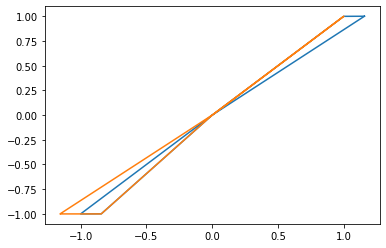

In [6]:
theta = np.arctan2(this_xc.xp-this_xc.xm, this_xc.yp-this_xc.ym)
plot(this_xc.x,cos(theta))
plot(this_xc.y,-sin(theta))


In [ ]:
np.arctan2()